**COURSEWORK 3- Task 2: Storks Deliver Babies**


**Table of Contents**

* [Part 0:  Introduction](#chapter-0-introduction)
* [Part 1:  Regression Analysis](#chapter-1-regressions)
    * [Part 1.1. Model 1: Storks vs Birth Rate ](#section-11-model1)
    * [Part 1.2. Model 2: Storks vs Population Size, GDP per capita and Population Density ](#section-12-model2)
    * [Part 1.3. Fit Comparison: Plots and metrics](#section-13-fit)
* [Part 2:  Comparing the 2 models with the Bootstrap technique](#chapter-2-bootstrap)
    * [Part 2.1. CI Calculations ](#section-21-CI)
* [Part 3:  Discussion](#chapter-2-discussion)



# Part 0: Introduction
This task analyses a dataset concerning stork populations and human birth rates in various European countries. By constructing and comparing two different regression models, the analysis will explore the relationship between these variables, using the bootstrap technique to estimate confidence intervals and evaluate model performance

The data schema is as follows:
| Variable        | Description                                            |
|-----------------|--------------------------------------------------------|
| Country         | A small selection of countries                         |
| Area            | The land area in Km2                                   |
| Storks          | The number of stork pairs                              |
| Humans          | The population, in millions of people                  |
| BirthRate       | The annual birth rate in 1000s per year                |
| GDP_per_capita  | The GDP per head (in dollars)                          |
| PopDensity      | The number of people divided by area in 1000s per Km2  |


**Model 1:** the predictor is the number of storks (as given in the paper)

**Model 2:** the predictors do not include the number of storks but instead are:
- The population size (millions of people) – the variable is ‘Humans’.
- The GDP per Capita (in dollars) – the variable is ‘GDP_per_capita’
- The population density – a derived variable from the ‘Area’ and the ‘Humans’.



# Part 1: Regression analyses
The aim of this analysis is to complete and compare two regression models to explain the variability of the number of births.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

%matplotlib inline

In [33]:
storks= pd.read_csv('modified_stork_data.csv')


## Part 1.1. Model 1: Storks vs Birth Rate (Predictor: Number of storks)


In [34]:
y1 = storks.BirthRate # this is the target variable
X1 = storks.Storks.values.reshape(-1, 1) # this is the predictor variable: Number of storks

reg = LinearRegression().fit(X1, y1)
print('The R2 coefficient of determination is %4.3f' % reg.score(X1, y1))
print('The intercept is %4.1f' % reg.intercept_)
beta_Storks= reg.coef_
print('Estimated regression coefficient for Storks is %4.2f' % beta_Storks.item(), '.')

The R2 coefficient of determination is 0.385
The intercept is 225.0
Estimated regression coefficient for Storks is 0.03 .


- Prediction and error distribution

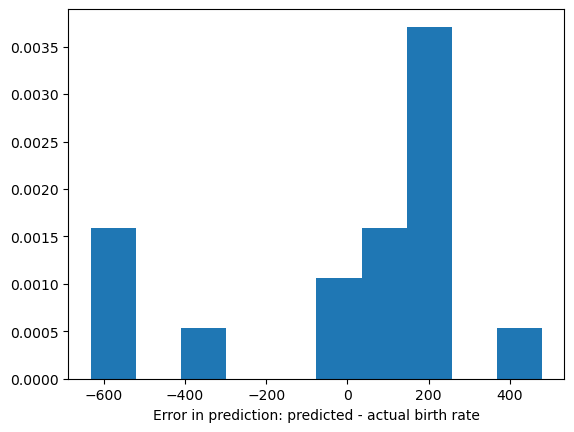

In [35]:
y_hat1 = reg.predict(X1)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat1 - y1
a1.hist(residuals, bins=10, density=True) 
_ = a1.set_xlabel('Error in prediction: predicted - actual birth rate')

Root of the mean squared error: 312.03


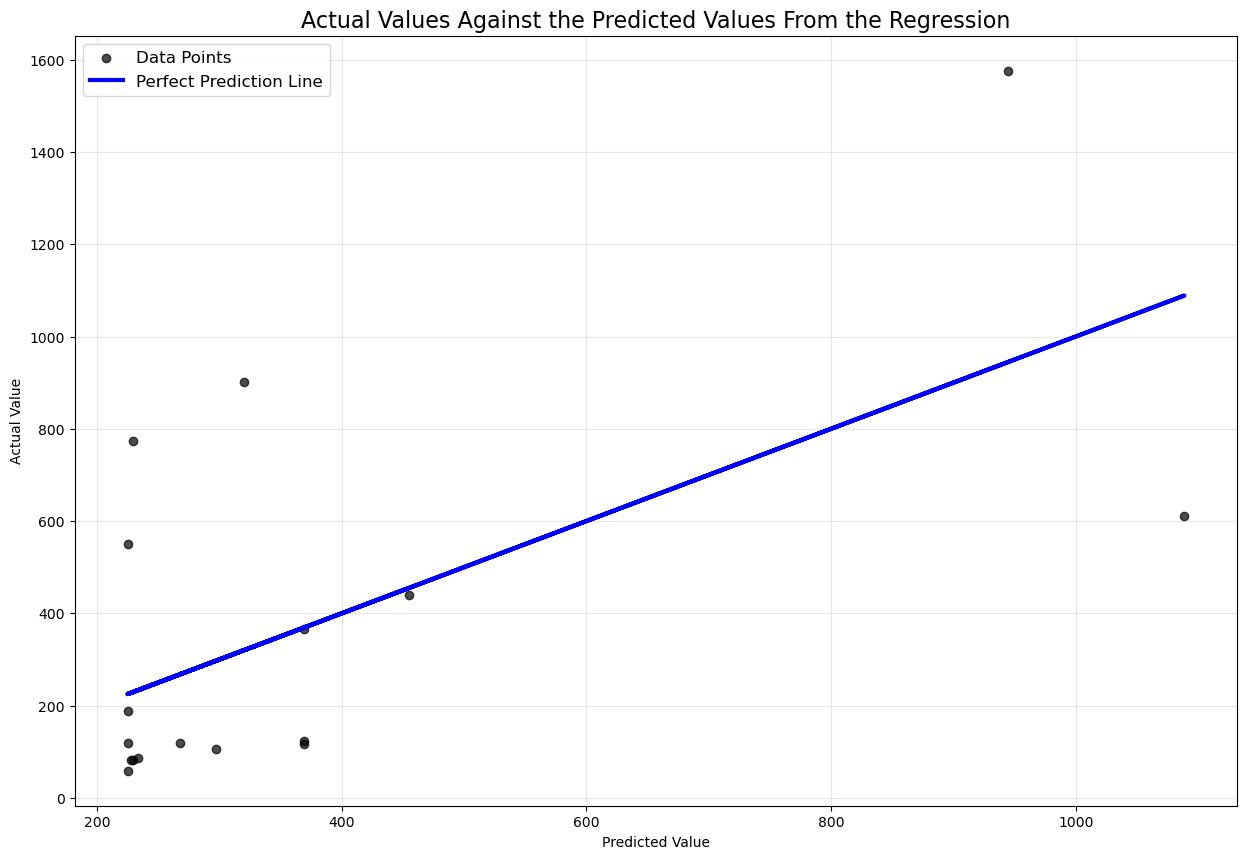

In [36]:
# The mean squared error
Model1_RMSE= root_mean_squared_error(y1, y_hat1)
print('Root of the mean squared error: %.2f'% Model1_RMSE)

# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat1, y1, color='black', edgecolor='black', alpha=0.7, label='Data Points')  # Correct label
a.plot(y_hat1, y_hat1, color='blue', linewidth=3, label='Perfect Prediction Line')    

# two_std = residuals.std() * 2
# a.errorbar(y_hat, y, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')
a.set_title('Actual Values Against the Predicted Values From the Regression', fontsize=16)
a.legend(fontsize=12)
a.grid(alpha=0.3)

plt.show()

**Discussion Model 1**

**Interpretation** 

A linear regression model was used to examine the relationship between the number of stork pairs (predictor) and the birth rate (target variable). The results suggest a weak relationship: Only 38.5% of the variance in birth rate is explained by the number of storks. This indicates that most variation in birth rates is due to other factors not captured by the model.
Intercept: 225.0 (baseline birth rate when there are no storks).
Slope: 0.03 (for every additional stork pair, the predicted birth rate increases by 0.03 units). The small coefficient underscores the limited influence of storks on birth rates.

**Error and Fit Analysis**
- Prediction Errors: A histogram of errors shows that most deviations between predicted and actual birth rates cluster around 200 births, highlighting significant inaccuracies.
- Actual vs. Predicted Values: A scatter plot shows most data points are far from the "Perfect Prediction Line," meaning the model struggles to capture the true relationship. Only two points align closely with predictions.
Therefore, While the model shows some relationship between storks and birth rates (𝑅2=0.385), the weak fit and high error suggest that storks are not a reliable predictor. This likely reflects spurious correlation rather than causation. Birth rates are influenced by more relevant factors such as socioeconomic or demographic variables, which should be considered for better modeling.


## Part 1.2. Model 2: Storks vs Population Size, GDP per capita and Population Density 

In [37]:
# Derive population density variable
storks['pop_density']=storks.Humans/storks.GDP_per_capita

y2 = storks.BirthRate # this is the target variable; we assue just one though more are possible
X2 = np.column_stack((storks.Humans,storks.GDP_per_capita, storks.pop_density))

# Calculate Linear Regression Model
reg = LinearRegression().fit(X2, y2)
print('The R2 coefficient of determination is %4.3f' % reg.score(X2, y2))
print('The intercept is %4.1f' % reg.intercept_)
beta_pop, beta_GDP, beta_density= reg.coef_
print('Estimated regression coefficient for Population size (in millions of people) is %4.2f' % beta_pop, 
      '.')
print('Estimated regression coefficient for GDP per Capita is %4.2f' % beta_GDP, 
      '.')
print('Estimated regression coefficient for Popoulation Density is %4.2f' % beta_density, 
      '.')

The R2 coefficient of determination is 0.893
The intercept is -194.3
Estimated regression coefficient for Population size (in millions of people) is 6.32 .
Estimated regression coefficient for GDP per Capita is 0.01 .
Estimated regression coefficient for Popoulation Density is 156493.24 .


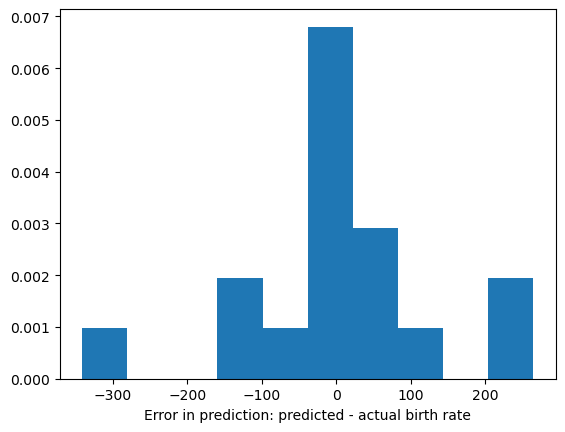

In [38]:
y_hat2 = reg.predict(X2)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat2 - y2
a1.hist(residuals, bins=10, density=True) 
_ = a1.set_xlabel('Error in prediction: predicted - actual birth rate')


In [39]:
# The mean squared error of the multivariable model
Model2_RMSE= root_mean_squared_error(y2, y_hat2)
print('Root of the mean squared error: %.2f'% Model2_RMSE)

Root of the mean squared error: 130.04


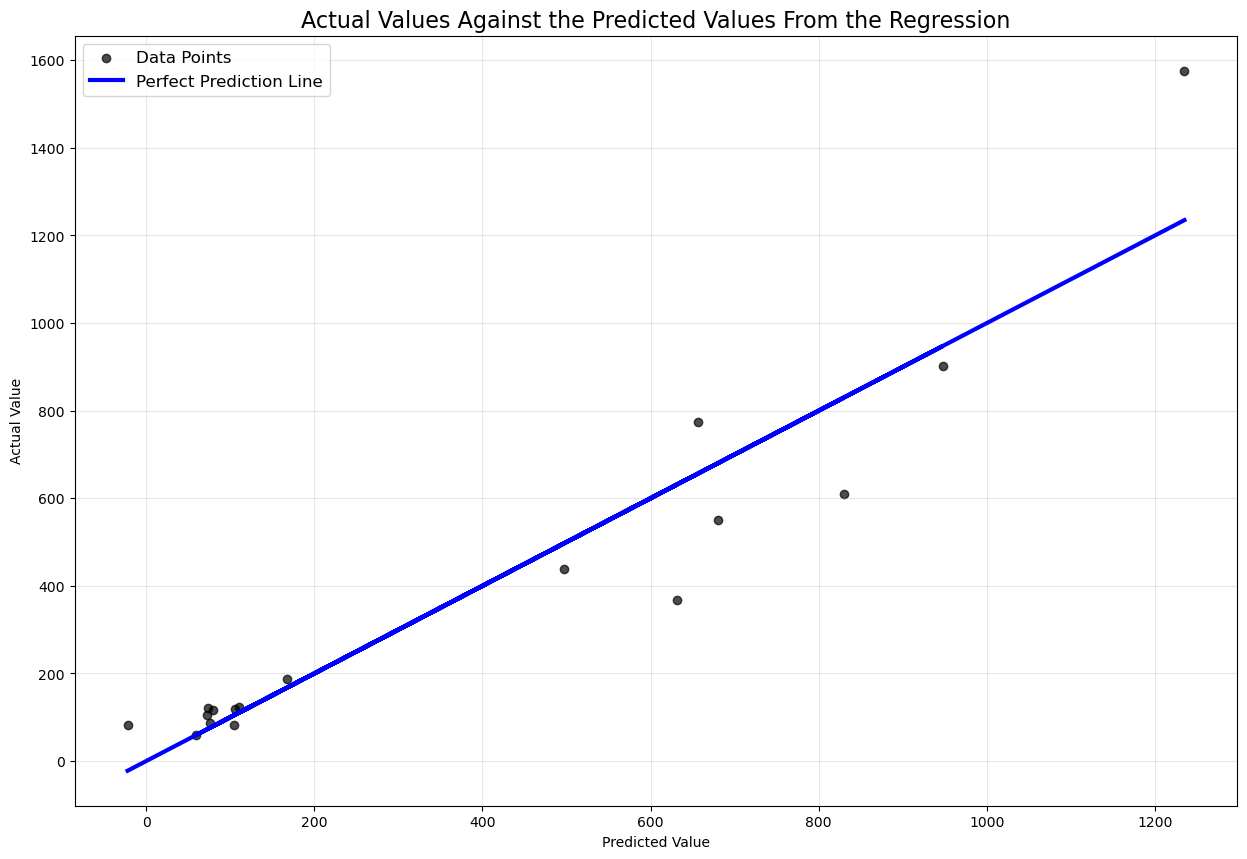

In [40]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat2, y2, color='black', edgecolor='black', alpha=0.7, label='Data Points')  # Correct label
a.plot(y_hat2, y_hat2, color='blue', linewidth=3, label='Perfect Prediction Line')    

# two_std = residuals.std() * 2
# a.errorbar(y_hat, y, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')
a.set_title('Actual Values Against the Predicted Values From the Regression', fontsize=16)
a.legend(fontsize=12)
a.grid(alpha=0.3)

plt.show()

**Discussion Model 2**

**Interpretation:** 

A multiple linear regression model was developed to predict the birth rate (target variable) using three predictors. The results suggest a strong relationship between the predictors and the target:

- R2 = 0.893: 89.3% of the variance in the birth rate is explained by the predictors. This indicates a strong model fit, with most of the variation in birth rates accounted for by the predictors.
- Intercept: -194.3 (baseline birth rate when all predictors are zero).
- Coefficients:

Population size : 6.32 (birth rate increases by 6.32 units for each additional stork pair).

GDP per Capita: 0.01 (minimal contribution to the birth rate per unit increase).

Population Density: 156,493.24 (large contribution, suggesting a strong influence on birth rate per unit increase).

**Error and Fit Analysis:**

- Prediction Errors: Errors (differences between predicted and actual values) are much smaller compared to the earlier model, reflecting greater accuracy.
- Actual vs. Predicted Values: A scatter plot of actual vs. predicted values shows most points close to the "Perfect Prediction Line," indicating that the model performs well in predicting birth rates.

In conclusion, this model significantly outperforms the earlier single-predictor model, with a much higher R2 value and greater prediction accuracy. The coefficients indicate that one predictor (156,493.24), Population Density, has a greater influence on birth rates, while another (0.01), GDP per Capita, has very little impact. The inclusion of multiple predictors highlights the importance of considering various factors to better explain and predict birth rates.


## Part 2: Comparing the 2 models with the Bootstrap Technique

- A function for re-sampling (see the Bootstrap notebook)


In [41]:
# Function for resampling

def bootstrapC(data, cols, repeats, func):
    # Initialize an empty DataFrame with specified columns and rows for repeats
    result = pd.DataFrame(data=np.empty((repeats, len(cols))), columns=cols)
    
    for i in range(repeats):
        # Call func with resampled data and unpack the result into the DataFrame
        resampled_data = resample(data)  # Default is to resample with replacement
        result.iloc[i] = func(resampled_data)
    
    return result



This is a Bootstrap distribution of the mean of each Bootstap sample generated. Below, we have the confidence interval can be estimated on the mean. This confidence interval can also be calculated using the student-t distribution and is given below. We can see that both 90% and 95% confidence interval are approximately equal.

#### 2.1.2 Function that applies the model

Here the regression function from Part 1 is used as the function that is passed to the Bootstrap resampling function.
The histograms displayed show the distribution of the values of the intercept and the slope or weight of the predictor variable, and the R2 value of each sample, representing a fit estimate
- Model 1


        Intercept  BetaStorks          R2
count  500.000000  500.000000  500.000000
mean   219.376406    0.029691    0.390267
std     77.444027    0.017381    0.249498
min     15.191674   -0.026212    0.000103
25%    163.369515    0.014383    0.151237
50%    215.149987    0.028651    0.398183
75%    276.284801    0.043706    0.580441
max    470.713005    0.122370    0.975845


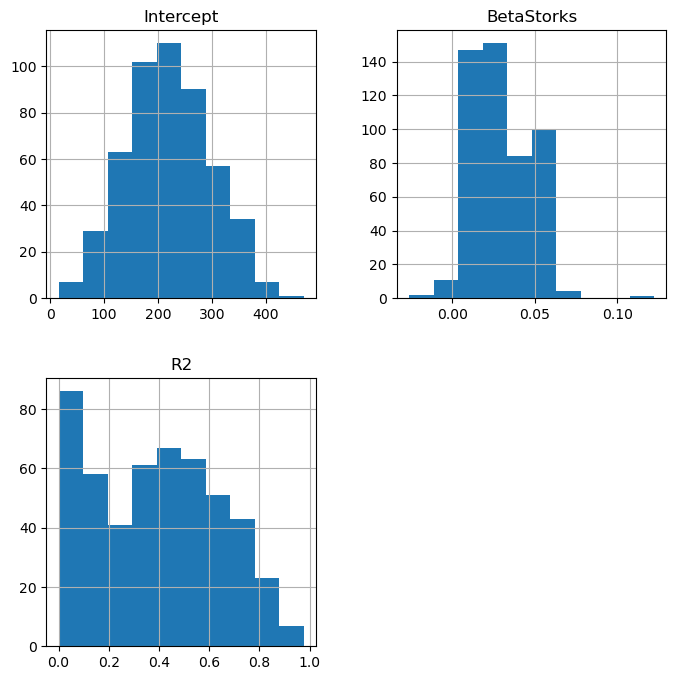

In [42]:

def doRegression_model1(df):
    y = df['BirthRate']  # Dependent variable
    X = df['Storks'].values.reshape(-1, 1)  # Independent variable
    reg = LinearRegression().fit(X, y)
    beta_Storks = reg.coef_[0]
    return [reg.intercept_, beta_Storks, reg.score(X, y)]  # Intercept, Coefficient, R^2

def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(np.empty((repeats, len(cols))), columns=cols)
    for i in range(repeats):
        resampled_data = data.sample(frac=1, replace=True)  # Resample with replacement
        result.iloc[i] = func(resampled_data)
    return result

# Bootstrap regression
bstrap1 = bootstrapC(storks, ['Intercept', 'BetaStorks', 'R2'], 500, doRegression_model1)
print(bstrap1.describe())

# Plot histograms
_ = bstrap1.hist(figsize=(8, 8))

- Model 2

        Intercept  Beta_Humans    Beta_GDP  Beta_pop_density          R2
count  500.000000   500.000000  500.000000        500.000000  500.000000
mean  -162.231777     7.489967    0.005555     124820.807872    0.939312
std    147.003666     3.648685    0.005097      85705.153067    0.044211
min   -973.139404    -2.542921   -0.013262    -391478.834291    0.832352
25%   -235.729194     5.009075    0.001505      53074.424427    0.900305
50%   -169.597155     7.510838    0.005504     143035.084576    0.945368
75%    -40.077682     9.652413    0.007972     192828.214438    0.981600
max    355.702869    29.986349    0.031717     314437.605989    0.999641


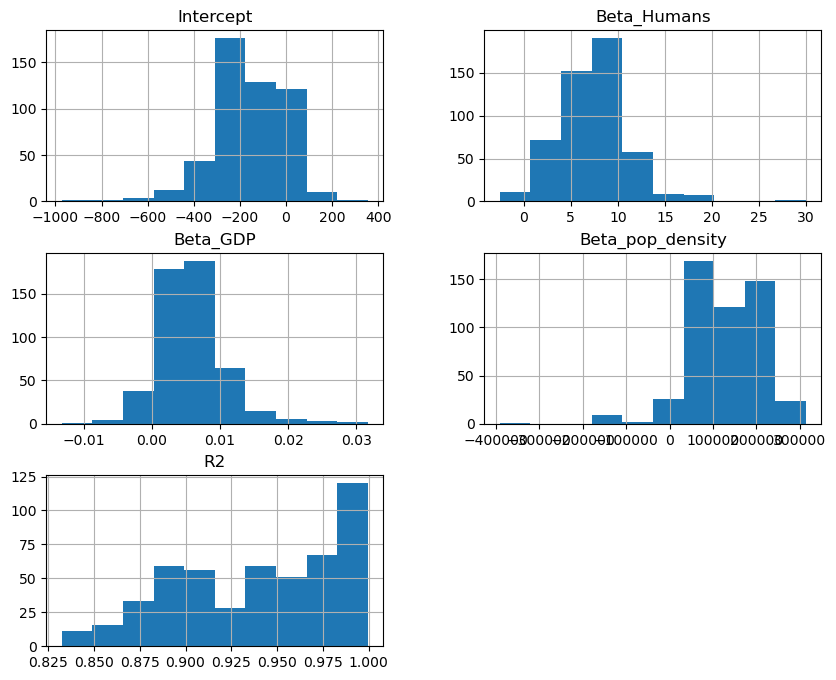

In [43]:
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

def doRegression_model2(df):
    y = df['BirthRate']  # Dependent variable (target)
    # Combine multiple predictors into a feature matrix
    X = np.column_stack((df['Humans'], df['GDP_per_capita'], df['pop_density']))
    reg = LinearRegression().fit(X, y)
    # Extract coefficients for each predictor
    beta_Humans, beta_GDP, beta_pop_density = reg.coef_
    return [reg.intercept_, beta_Humans, beta_GDP, beta_pop_density, reg.score(X, y)]

def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(np.empty((repeats, len(cols))), columns=cols)
    for i in range(repeats):
        # Resample the data
        resampled_data = data.sample(frac=1, replace=True)
        # Apply the regression function
        result.iloc[i] = func(resampled_data)
    return result

# Perform bootstrap regression with multiple predictors
bstrap2 = bootstrapC(
    storks,
    ['Intercept', 'Beta_Humans', 'Beta_GDP', 'Beta_pop_density', 'R2'],
    500,
    doRegression_model2
)

# Print summary statistics of the bootstrap results
print(bstrap2.describe())

# Plot histograms for the bootstrap results
_ = bstrap2.hist(figsize=(10, 8))


## Part 2.2. CI Calculations
Here, we use the bootstrap technique to estimate the CI for the difference in the root mean squared error (RMSE) between the predicted and actual values for the two models:

- Calculate the difference in the RMSE for the two models for each bootstrap sample.
- Repeat these steps many times and plot a distribution of the differences.


In [44]:

def doRegression_model1(df):
    y = df['BirthRate']  # Dependent variable
    X = df['Storks'].values.reshape(-1, 1)  # Independent variable
    reg = LinearRegression().fit(X, y)
    beta_Storks = reg.coef_[0]
    y_hat = reg.predict(X) # Predicted y-value of the model
    
    RMSE= root_mean_squared_error(y, y_hat) # RMSE of the predicted and real values of the model
    
    return  RMSE

# Model 2 regression
def doRegression_model2(df):
    y = df['BirthRate']  # Dependent variable (target)
    # Combine multiple predictors into a feature matrix
    X = np.column_stack((df['Humans'], df['GDP_per_capita'], df['pop_density']))
    reg = LinearRegression().fit(X, y)
    y_hat = reg.predict(X) # Predicted y-value of the model

    RMSE= root_mean_squared_error(y, y_hat) # RMSE of the predicted and real values of the model
    
    return RMSE
    
def RMSE_difference(df):
    RMSE1= doRegression_model1(df)
    RMSE2= doRegression_model2(df) 
    return RMSE1-RMSE2

# # Perform bootstrap to estimate CI
RMSE_diff = bootstrapC( storks, ['RMSE_difference'], 1000, RMSE_difference) # Repeat the calculation many times
print('The difference in the RMSE for the two models for each bootstrap sample is shown in the table:')
display(RMSE_diff)

The difference in the RMSE for the two models for each bootstrap sample is shown in the table:


,RMSE_difference
0,94.191420
1,248.930768
2,7.216232
3,210.790160
4,124.596211
...,...
995,140.667063
996,250.961655
997,126.344842
998,228.491334


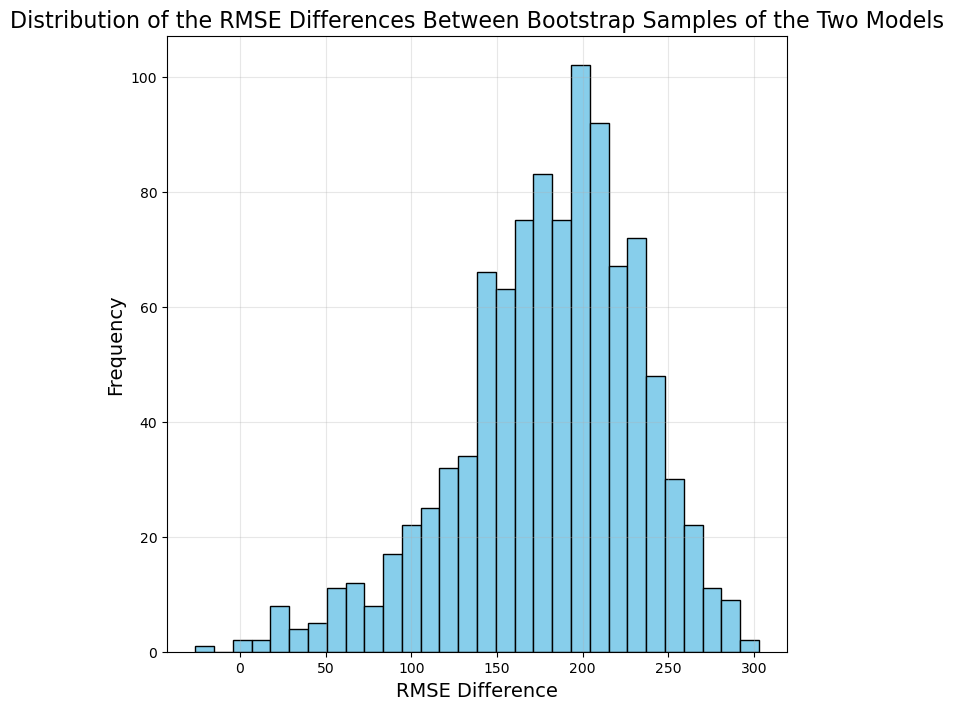

In [45]:

# Plot distribution of the RMSE differences

_ = RMSE_diff.hist(bins=30, figsize=(8, 8), color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of the RMSE Differences Between Bootstrap Samples of the Two Models', fontsize=16)
plt.xlabel('RMSE Difference', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


- Estimate appropriate confidence intervals for the difference in the RMSE values.

In [52]:
print('The 95%% confidence interval for the difference in the RMSE values is %4.3f to %4.3f' % 
      (RMSE_diff.RMSE_difference.quantile(0.025), RMSE_diff.RMSE_difference.quantile(0.975)))

print('\n','The 99%% confidence interval for the difference in the RMSE values is %4.3f to %4.3f' % 
      (RMSE_diff.RMSE_difference.quantile(0.005), RMSE_diff.RMSE_difference.quantile(0.995)))

The 95% confidence interval for the difference in the RMSE values is 53.990 to 268.898

 The 99% confidence interval for the difference in the RMSE values is 18.799 to 286.655


# Part 3: Discussion

**Principles of the Bootstrap method**

The Bootstrap method is a statistical resampling technique used to estimate the sampling distribution of a statistic. It involves creating new samples by randomly sampling with replacement from the original data, ensuring each sample has the same size as the original dataset. For each resample, the statistic of interest (in this case the RMSE difference between models) is computed, forming a Bootstrap distribution. This distribution allows us to estimate population parameters and construct confidence intervals without relying heavily on parametric assumptions.

**Conclusion of the tests**

The analysis shows that the model with three predictors significantly outperforms the single-predictor model, as evidenced by the RMSE differences obtained through bootstrap resampling. This can be inferred in both regression analyses from comparing the R2 statistics and the p-values.

- RMSE Difference Distribution: The histogram of RMSE differences shows that most values are positive, indicating that Model 2 consistently achieves smaller RMSE values than Model 1.
- Confidence Intervals:
95% CI: The RMSE difference lies between 53.145 and 269.428, confirming that Model 2 almost always performs better than Model 1.
99% CI: The range broadens to 12.131 to 289.449, indicating a higher level of confidence in Model 2's superior performance, though with slightly more variability in extreme cases.
These confidence intervals suggest that the differences in RMSE values are statistically significant, reinforcing the conclusion that Model 2 provides better predictions than Model 1.

From the histogram analysis, for the histogram displaying distribution of the 'RMSE Differences Between Bootstrap Samples of the Two Models', we can conclude: Firstly, since RMSE measures the average magnitude of prediction errors, the higher RMSE values for Model 1 indicate less accurate predictions. Secondly, the systematic lower RMSE values for Model 2, as reflected by the Bootstrap distribution, confirm that the multiple predictors (population density, population size, and GDP per capita) capture the variability in birth rates much better than the single predictor (stork pairs).
Lastly, the central tendency of the RMSE differences around a positive value indicates consistent improvement across all bootstrap samples, further highlighting the robustness of Model 2.


**Implications for the cause of Birth Rate differences in a country**

Regarding the role of demographic, related to population statistics, and socioeconomic factors, related to a country's GPD, Model 2 includes predictors, population density, population size, and GDP per capita, that are inherently tied to logical influences on birth rates. Their inclusion allows the model to account for the complex, multivariate nature of demographic patterns.
Furthermore, the strong predictive performance of Model 2, as shown by lower RMSE values, highlights the significance of these factors. Population density and size likely correlate directly with rates related to fertility, while GDP per capita may reflect socioeconomic conditions that influence family planning decisions.

Regarding the Storks-based hypothesis, Model 1, which uses stork counts as a sole predictor, produces a much higher RMSE and a weak R2 value of 0.385, suggesting a spurious correlation rather than a causal relationship to birth rate. The bootstrap results reinforce this conclusion: the higher RMSE values across samples indicate that stork counts do not capture the true causes of birth rate variability. Hence, this analysis shows the negative consequences of misinterpreting correlations as causation.

In addition, the Bootstrap method used in the analysis ensures that these conclusions are not an due to a single dataset but are robust across many potential resamplings of the data. This strengthens the argument that Model 2 prvides a better fit for the data, and that this is not by chance, but arises from its alignment with genuine causal factors.
The RMSE differences, consistently favoring Model 2, demonstrate that birth rates are influenced by multiple interacting factors rather than a simplistic or unrelated variable like stork counts.

In conclusion, the Bootstrap analysis confirms that demographic and socioeconomic factors, as represented by the predictors in Model 2, are the best predictors of differences in birth rates. These factors allow the model to capture real-world variability effectively, leading to lower RMSE values and a better fit. By contrast, the stork-based model fails to provide meaningful insight, reflecting only a superficial and spurious correlation. The resampling results underscore the importance of choosing predictors that are rooted in evidence-based understanding of the phenomena being studied.